# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [18]:
X_train_feats.shape

(49000L, 155L)

In [24]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################

# Create possible combination of learning rates and regularization strenghts 
from sklearn.utils.extmath import cartesian
n = 10
lrn_rt   = np.zeros(n)
rgzn_str = np.zeros(n)

inc_lrn  = (np.log(learning_rates[1]) - np.log(learning_rates[0])) / (n-1)
inc_reg  = (np.log(regularization_strengths[1]) - np.log(regularization_strengths[0])) / (n-1)

for i in xrange(n):
    lrn_rt[i]   = np.exp(np.log(learning_rates[0]) + inc_lrn*i)
    rgzn_str[i] = np.exp(np.log(regularization_strengths[0]) + inc_reg*i)
  
options = cartesian((lrn_rt,rgzn_str))


# train for every possible combination 
for i in xrange(options.shape[0]):
    
    print(i)
    # Train new SVM
    svm_cur = LinearSVM() 
    svm_cur.train(X_train_feats, y_train, learning_rate=1e-9, reg=1e5, num_iters=1500, verbose=False)
#    svm_cur.train(X_train, y_train, learning_rate=options[i,0], reg=options[i,1], num_iters=1500, verbose=False)
    
    # Calculate the predictions
    y_train_pred = svm_cur.predict(X_train_feats)
    y_val_pred   = svm_cur.predict(X_val_feats)
    y_val_acc    = np.mean(y_val == y_val_pred)
    
    # Store the accuracies in the dictionary
    results[(options[i,0],options[i,1])] = (np.mean(y_train == y_train_pred),y_val_acc)
    
    # Update the best SVM and its validation accuracy
    if best_val < y_val_acc:
        best_val = y_val_acc
        best_svm = svm_cur
        
# lr 7.790192e-08 reg 2.154435e+04 train accuracy: 0.381592 val accuracy: 0.401000

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.113429 val accuracy: 0.100000
lr 1.000000e-09 reg 1.291550e+05 train accuracy: 0.102551 val accuracy: 0.100000
lr 1.000000e-09 reg 1.668101e+05 train accuracy: 0.129347 val accuracy: 0.129000
lr 1.000000e-09 reg 2.154435e+05 train accuracy: 0.111551 val accuracy: 0.096000
lr 1.000000e-09 reg 2.782559e+05 train accuracy: 0.112612 val accuracy: 0.097000
lr 1.000000e-09 reg 3.593814e+05 train accuracy: 0.114163 val accuracy: 0.108000
lr 1.000000e-09 reg 4.641589e+05 train accuracy: 0.114898 val accuracy: 0.121000
lr 1.000000e-09 reg 5.994843e+05 train accuracy: 0.088878 val accuracy: 0.080000
lr 1.000000e-09 reg 7.742637e+05 train accuracy: 0.087041 val 

In [25]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.124


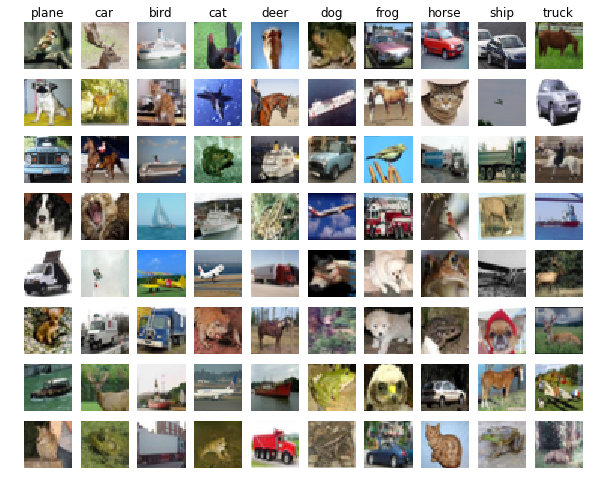

In [26]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [27]:
print X_train_feats.shape

(49000L, 155L)


In [7]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

results  = {}
best_val = -1
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################

# range for hyperparameters
learning_rates = [1e-1, 1e2]
regularization_strengths = [1e-5, 2e-2]

# Create possible combination of learning rates and regularization strenghts 
from sklearn.utils.extmath import cartesian
n = 10
lrn_rt   = np.zeros(n)
rgzn_str = np.zeros(n)

inc_lrn  = (np.log(learning_rates[1]) - np.log(learning_rates[0])) / (n-1)
inc_reg  = (np.log(regularization_strengths[1]) - np.log(regularization_strengths[0])) / (n-1)

for i in xrange(n):
    lrn_rt[i]   = np.exp(np.log(learning_rates[0]) + inc_lrn*i)
    rgzn_str[i] = np.exp(np.log(regularization_strengths[0]) + inc_reg*i)
  
options = cartesian((lrn_rt,rgzn_str))

# train for every possible combination 
for i in xrange(options.shape[0]):
    
    print(i)
    # Train new Neural Net
    net_cur   = TwoLayerNet(input_dim, hidden_dim, num_classes)
    stats_cur = net_cur.train(X_train_feats, y_train, X_val_feats, y_val, num_iters=1500, batch_size=200,
                          
                          learning_rate=options[i,0], learning_rate_decay=0.95, reg=options[i,1],
                          
                          verbose=False)
    
    # Calculate the predictions
    tra_cur_pred   = net_cur.predict(X_train_feats)
    val_cur_pred   = net_cur.predict(X_val_feats)
    
    # Calculate the accuracies
    tra_cur_acc    = np.mean(y_train == tra_cur_pred)
    val_cur_acc    = np.mean(y_val == val_cur_pred)  
    
    # Store the accuracies in the dictionary
    results[(options[i,0],options[i,1])] = (tra_cur_acc, val_cur_acc)
    
    # Update the best net and its validation accuracy
    if best_val < val_cur_acc:
        best_val       = val_cur_acc
        best_net       = net_cur
        best_net_stats = stats_cur

        
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
        lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# lr 2.154435e-01 reg 2.931733e-04 train accuracy: 0.604245 val accuracy: 0.583000
# lr 4.641589e-01 reg 1.000000e-05 train accuracy: 0.684000 val accuracy: 0.597000
# lr 4.641589e-01 reg 2.326918e-05 train accuracy: 0.682286 val accuracy: 0.586000
# lr 4.641589e-01 reg 5.414548e-05 train accuracy: 0.682878 val accuracy: 0.589000
# lr 4.641589e-01 reg 1.259921e-04 train accuracy: 0.677571 val accuracy: 0.585000
# lr 4.641589e-01 reg 2.931733e-04 train accuracy: 0.673898 val accuracy: 0.588000
# lr 4.641589e-01 reg 3.693752e-03 train accuracy: 0.624122 val accuracy: 0.595000
# lr 1.000000e+00 reg 5.414548e-05 train accuracy: 0.735776 val accuracy: 0.592000
# lr 1.000000e+00 reg 1.259921e-04 train accuracy: 0.734286 val accuracy: 0.582000
# best validation accuracy achieved during cross-validation: 0.597000


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


cs231n\classifiers\neural_net.py:101: RuntimeWarning: overflow encountered in exp
  exp_sco = np.exp(scores)
cs231n\classifiers\neural_net.py:103: RuntimeWarning: invalid value encountered in divide
  exp_fra = np.divide(exp_sco, exp_sum[:,None])
cs231n\classifiers\neural_net.py:107: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(los_fra))
cs231n\classifiers\neural_net.py:136: RuntimeWarning: divide by zero encountered in divide
  dL_dfra = np.divide(-1,los_fra)
cs231n\classifiers\neural_net.py:139: RuntimeWarning: invalid value encountered in multiply
  mult    = np.multiply(-los_fra, dL_dfra)
cs231n\classifiers\neural_net.py:143: RuntimeWarning: invalid value encountered in multiply
  dL_dsco[np.arange(N),y] = np.multiply(np.subtract(los_fra, np.power(los_fra, 2)), dL_dfra)
cs231n\classifiers\neural_net.py:78: RuntimeWarning: invalid value encountered in maximum
  ReLU    = lambda x: np.maximum(x,0)
cs231n\classifiers\neural_net.py:133: RuntimeWarning: inva

52


cs231n\classifiers\neural_net.py:136: RuntimeWarning: overflow encountered in divide
  dL_dfra = np.divide(-1,los_fra)
cs231n\classifiers\neural_net.py:140: RuntimeWarning: invalid value encountered in multiply
  dL_dsco = np.multiply(exp_fra, mult[:,None])


53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


cs231n\classifiers\neural_net.py:148: RuntimeWarning: invalid value encountered in multiply
  dL_dHa = np.multiply(bin_act, dL_dsco.dot(W2.transpose()))


70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
lr 1.000000e-01 reg 1.000000e-05 train accuracy: 0.540245 val accuracy: 0.523000
lr 1.000000e-01 reg 2.326918e-05 train accuracy: 0.541653 val accuracy: 0.518000
lr 1.000000e-01 reg 5.414548e-05 train accuracy: 0.542755 val accuracy: 0.531000
lr 1.000000e-01 reg 1.259921e-04 train accuracy: 0.542694 val accuracy: 0.530000
lr 1.000000e-01 reg 2.931733e-04 train accuracy: 0.539204 val accuracy: 0.525000
lr 1.000000e-01 reg 6.821903e-04 train accuracy: 0.540612 val accuracy: 0.530000
lr 1.000000e-01 reg 1.587401e-03 train accuracy: 0.540469 val accuracy: 0.526000
lr 1.000000e-01 reg 3.693752e-03 train accuracy: 0.538286 val accuracy: 0.520000
lr 1.000000e-01 reg 8.595059e-03 train accuracy: 0.528653 val accuracy: 0.519000
lr 1.000000e-01 reg 2.000000e-02 train accuracy: 0.515429 val accuracy: 0.516000
lr 2.154435e-01 reg 1.000000e-05 train accuracy: 0.606633 val accuracy: 0.560000
lr 2.154435e-01 reg

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!